In [44]:
import pandas as pd

In [45]:
import matplotlib.pyplot as plt

In [46]:
import numpy as np

In [47]:
data = pd.read_csv('DataSet_HAR.csv')

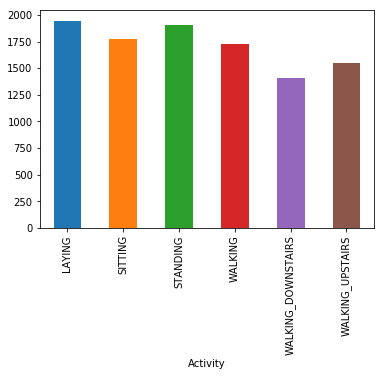

In [48]:
classsize = data.groupby(['Activity']).size()
classsize.plot.bar()

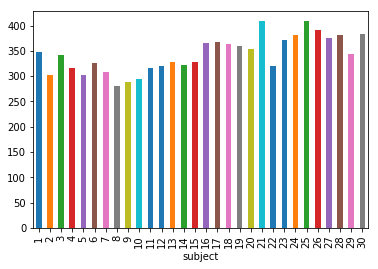

In [49]:
subjects = data.groupby(['subject']).size()
subjects.plot.bar()

In [50]:
import itertools
import random
def split_to_train_test(df, subject):
    train_df= pd.DataFrame()
    subjects = df[subject].unique()
    random.shuffle(subjects)
    for i in range(21):
        lbl_df = df[df[subject] == subjects[i]]
        train_df = train_df.append(lbl_df)
    test_df = df.drop(train_df.index)
    y_train = train_df.pop('Activity')
    y_test = test_df.pop('Activity')
    return train_df, test_df, y_train, y_test


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [51]:
X_train, X_test, Y_train, Y_test = split_to_train_test(data,'subject')
X_train.pop('subject')
X_test.pop('subject')

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
8843    12
8844    12
8845    12
8846    12
8847    12
8848    12
8849    12
8850    12
8851    12
8852    12
8853    12
8854    12
8855    12
8856    12
8857    12
8858    12
8859    12
8860    12
8861    12
8862    12
8863    12
8864    12
8865    12
8866    12
8867    12
8868    12
8869    12
8870    12
8871    12
8872    12
Name: subject, Length: 3161, dtype: int64

In [91]:
def Cross_validation(df, subject, iteration, Classifier):
    Accuracy = []
    size = 30/iteration
    for i in range(iteration):
        test_df = pd.DataFrame()
        lbl_df = df[df[subject].isin(range(int(i*size),int((i+1)*size)))]
        test_df = test_df.append(lbl_df)
        train_df = df.drop(test_df.index)
        X_train = train_df
        Y_train = X_train.pop('Activity')
        X_test = test_df
        Y_test = X_test.pop('Activity')
        X_train.pop('subject')
        X_test.pop('subject')
        model = Classifier
        small_X_train = X_train.loc[:, X_train.columns.isin(feature_importances.index[:20])]
        small_X_test = X_test.loc[:, X_test.columns.isin(feature_importances.index[:20])]
        model.fit(small_X_train, Y_train)
        score = model.score(small_X_test, Y_test)
        Accuracy.append(score)
    Average = sum(Accuracy)/iteration
    return Accuracy, Average

In [53]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [54]:
#Decision Tree
model1 = tree.DecisionTreeClassifier(criterion='gini')
model1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
Y_pred1 = model1.predict(X_test)
cm1 = confusion_matrix(Y_test, Y_pred1)

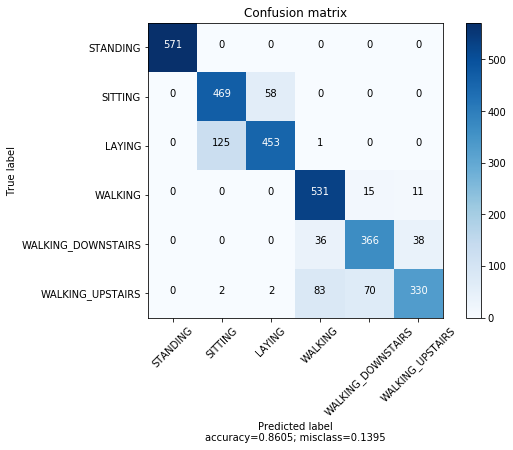

In [56]:
plot_confusion_matrix(cm1,
                          target_names=data['Activity'].unique(),
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [57]:
from sklearn import svm

In [58]:
#SVM
model2 = svm.SVC()
model2.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
Y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(Y_test, Y_pred2)

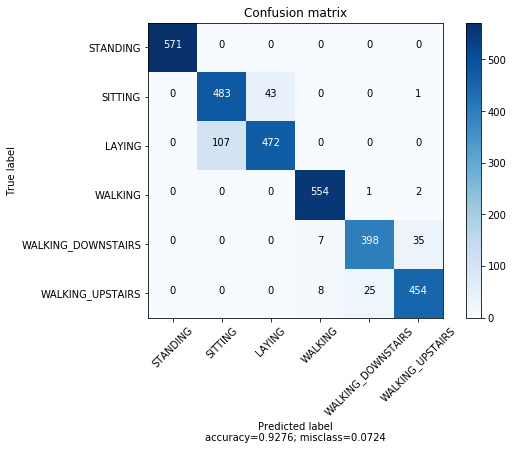

In [63]:
plot_confusion_matrix(cm2,
                          target_names=data['Activity'].unique(),
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [64]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier()

In [65]:
#Random Forest
model3.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
Y_pred3 = model3.predict(X_test)
cm3 = confusion_matrix(Y_test, Y_pred3)

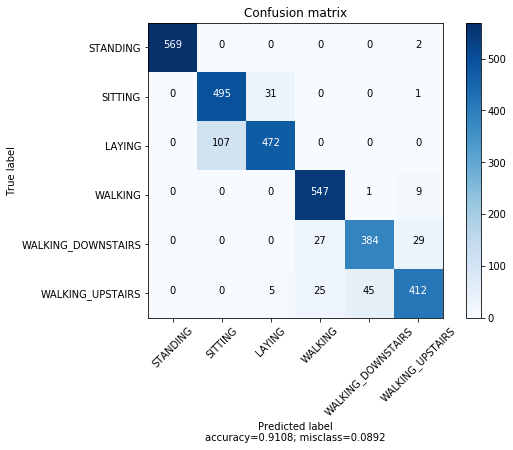

In [67]:
plot_confusion_matrix(cm3,
                          target_names=data['Activity'].unique(),
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

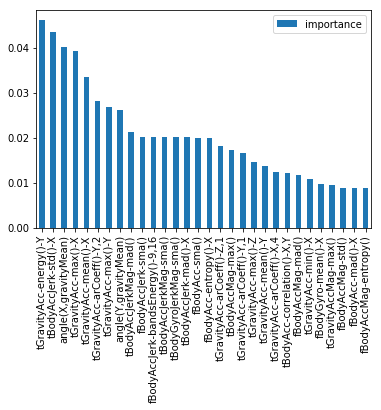

In [68]:
#Extract important features
feature_importances = pd.DataFrame(model3.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[0:30].plot.bar()

In [69]:
from sklearn.feature_selection import RFE

In [70]:
import seaborn as sns

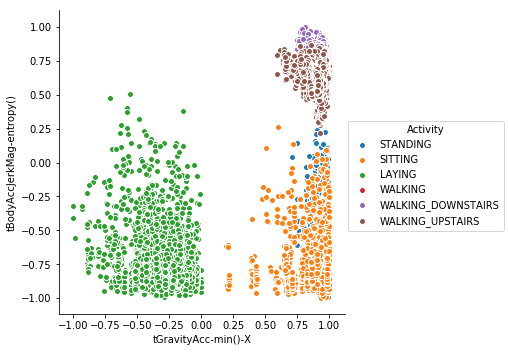

In [72]:
#plot using top 2 features
sns.pairplot(x_vars=['tGravityAcc-min()-X'], y_vars=['tBodyAccJerkMag-entropy()'], data=data, hue='Activity', size=5)

In [78]:
small_X_train = X_train.loc[:, X_train.columns.isin(feature_importances.index[:10])]
small_X_test = X_test.loc[:, X_test.columns.isin(feature_importances.index[:10])]

In [79]:
#Using subset of features
model4 = svm.SVC()
model4.fit(small_X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
Y_pred4 = model4.predict(small_X_test)
cm4 = confusion_matrix(Y_test, Y_pred4)

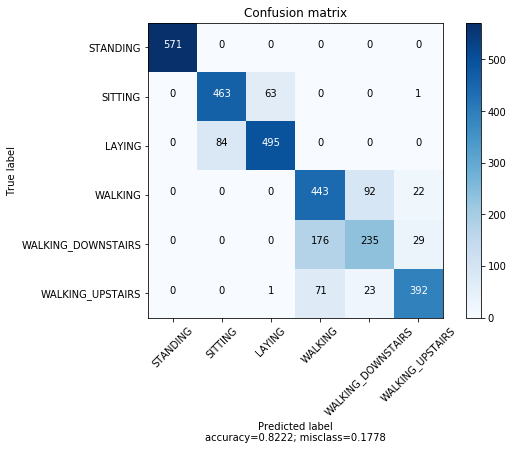

In [81]:
plot_confusion_matrix(cm4,
                          target_names=data['Activity'].unique(),
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [94]:
result, average = Cross_validation(data, 'subject',5 , RandomForestClassifier())
print(result)
print(average)

[0.8464885021752642, 0.815121412803532, 0.8533464566929134, 0.846259752179899, 0.8725919439579685]
0.8467616135619155
